In [53]:
# Telemetry System Performance Charts
# Change the filename variable below to use a different CSV file

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# Set the style for all charts
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Colors for consistent styling
PRIMARY_COLOR = "#3465a4"
SECONDARY_COLOR = "#cc0000"
GRID_COLOR = "#dddddd"
BACKGROUND_COLOR = "#ffffff"

# File to process - CHANGE THIS to process different files
filename = "../server_performance_initial_crash_1.csv"

# Load the data
print(f"Loading data from: {filename}")
df = pd.read_csv(filename)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display basic stats
print(f"Data range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total records: {len(df)}")
print(f"Max CPU: {df['cpu_percent'].max():.2f}%, Min CPU: {df['cpu_percent'].min():.2f}%")
print(f"Max Memory: {df['mem_mb'].max():.2f} MB, Min Memory: {df['mem_mb'].min():.2f} MB")
print(f"Max Threads: {df['num_threads'].max()}, Min Threads: {df['num_threads'].min()}")
print(f"Max Active Clients: {df['active_clients'].max()}, Min Active Clients: {df['active_clients'].min()}")

Loading data from: ../server_performance_initial_crash_1.csv
Data range: 2025-04-10 01:38:09 to 2025-04-10 01:42:42
Total records: 273
Max CPU: 4.50%, Min CPU: 0.00%
Max Memory: 27.64 MB, Min Memory: 18.86 MB
Max Threads: 202, Min Threads: 2
Max Active Clients: 200, Min Active Clients: 0


In [17]:
# Function to create consistently styled charts
def create_time_series_chart(df, y_column, title, y_label, color=PRIMARY_COLOR):
    """Create a time series chart with consistent styling"""
    plt.figure(figsize=(10, 6))
    
    # Calculate elapsed time in seconds from the first timestamp
    start_time = df['timestamp'].min()
    elapsed_seconds = [(t - start_time).total_seconds() for t in df['timestamp']]
    
    # Create the plot using elapsed time
    plt.plot(elapsed_seconds, df[y_column], color=color, linewidth=2.5)
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    
    # Set background color
    plt.gca().set_facecolor(BACKGROUND_COLOR)
    
    # Format the x-axis to show elapsed time in HH:MM:SS
    def format_time(x, pos=None):
        hours, remainder = divmod(x, 3600)
        minutes, seconds = divmod(remainder, 60)
        return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add labels and title
    plt.xlabel('Elapsed Time (HH:MM:SS)', fontweight='bold')
    plt.ylabel(y_label, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    # Add border around the plot
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(1.5)
    
    # Tight layout to ensure everything fits
    plt.tight_layout()
    
    return plt

In [18]:
# Create and display CPU usage chart
def plot_cpu_usage():
    fig = create_time_series_chart(
        df, 
        'cpu_percent', 
        f'CPU Usage Over Time - {filename}', 
        'CPU Usage (%)'
    )
    plt.ylim(bottom=0)  # Start y-axis at 0
    if df['cpu_percent'].max() < 5:  # If CPU usage is very low
        plt.ylim(top=5)  # Cap y-axis for better visibility
    plt.savefig('cpu_usage_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create and display memory usage chart
def plot_memory_usage():
    fig = create_time_series_chart(
        df, 
        'mem_mb', 
        f'Memory Usage Over Time - {filename}', 
        'Memory Usage (MB)',
        color=SECONDARY_COLOR
    )
    plt.ylim(bottom=0)  # Start y-axis at 0
    plt.savefig('memory_usage_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create and display active threads chart
def plot_thread_count():
    fig = create_time_series_chart(
        df, 
        'num_threads', 
        f'Thread Count Over Time - {filename}', 
        'Number of Threads',
        color='#4e9a06'  # Green color
    )
    plt.ylim(bottom=0)  # Start y-axis at 0
    # Use integer ticks for thread count
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.savefig('thread_count_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create and display active clients chart
def plot_active_clients():
    fig = create_time_series_chart(
        df, 
        'active_clients', 
        f'Active Clients Over Time - {filename}', 
        'Number of Active Clients',
        color='#75507b'  # Purple color
    )
    plt.ylim(bottom=0)  # Start y-axis at 0
    # Use integer ticks for client count
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.savefig('active_clients_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

In [19]:
# Optional: Create a combined metrics chart
def plot_combined_metrics():
    plt.figure(figsize=(12, 8))
    
    # Calculate elapsed time in seconds from the first timestamp
    start_time = df['timestamp'].min()
    elapsed_seconds = [(t - start_time).total_seconds() for t in df['timestamp']]
    
    # Normalize all metrics for comparison on the same scale
    cpu_norm = df['cpu_percent'] / df['cpu_percent'].max() if df['cpu_percent'].max() > 0 else df['cpu_percent']
    mem_norm = df['mem_mb'] / df['mem_mb'].max() if df['mem_mb'].max() > 0 else df['mem_mb']
    threads_norm = df['num_threads'] / df['num_threads'].max() if df['num_threads'].max() > 0 else df['num_threads']
    clients_norm = df['active_clients'] / df['active_clients'].max() if df['active_clients'].max() > 0 else df['active_clients']
    
    # Plot all normalized metrics on the same graph
    plt.plot(elapsed_seconds, cpu_norm, color=PRIMARY_COLOR, linewidth=2.5, label='CPU (%)')
    plt.plot(elapsed_seconds, mem_norm, color=SECONDARY_COLOR, linewidth=2.5, label='Memory (MB)')
    plt.plot(elapsed_seconds, threads_norm, color='#4e9a06', linewidth=2.5, label='Threads')
    plt.plot(elapsed_seconds, clients_norm, color='#75507b', linewidth=2.5, label='Active Clients')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7, color=GRID_COLOR)
    
    # Format the x-axis to show elapsed time in HH:MM:SS
    def format_time(x, pos=None):
        hours, remainder = divmod(x, 3600)
        minutes, seconds = divmod(remainder, 60)
        return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_time))
    
    # Add labels and title
    plt.xlabel('Elapsed Time (HH:MM:SS)', fontweight='bold')
    plt.ylabel('Normalized Value (0-1)', fontweight='bold')
    plt.title(f'Combined System Metrics - {filename}', fontsize=14, fontweight='bold')
    
    # Add border and styling
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(1.5)
    
    # Add legend
    plt.legend(loc='upper left')
    
    # Tight layout
    plt.tight_layout()
    
    plt.savefig('combined_metrics_chart.png', dpi=300, bbox_inches='tight')
    plt.show()


Generating charts...


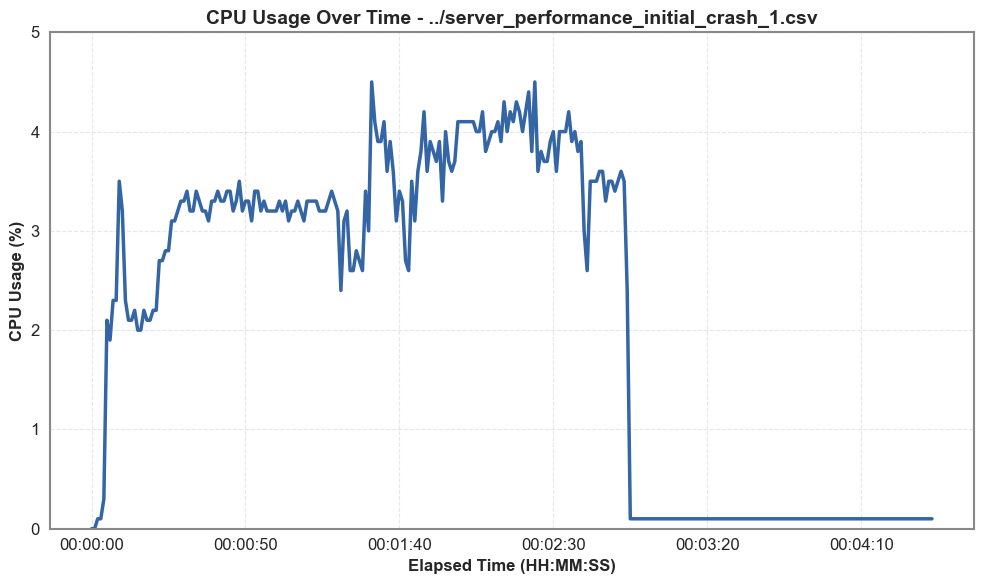

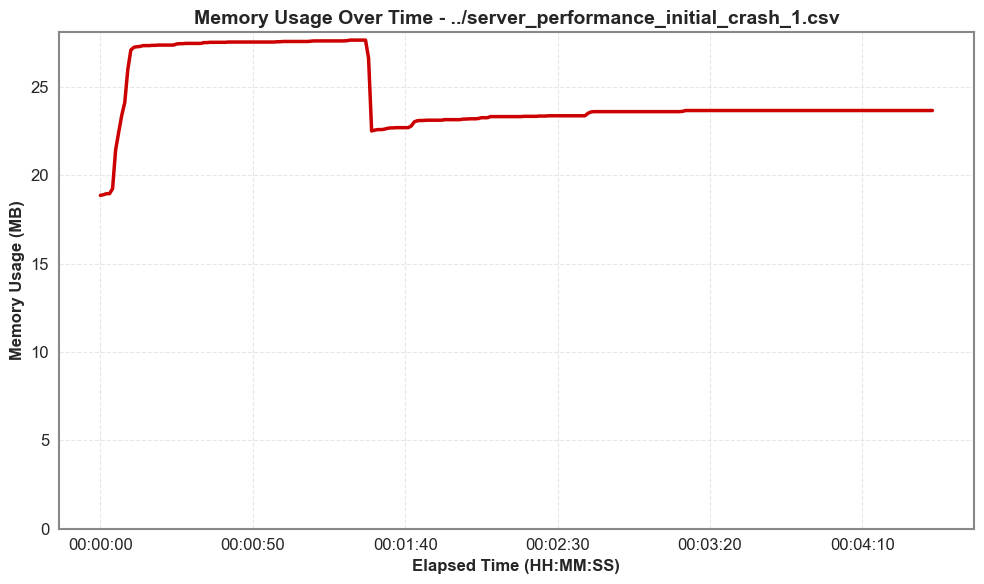

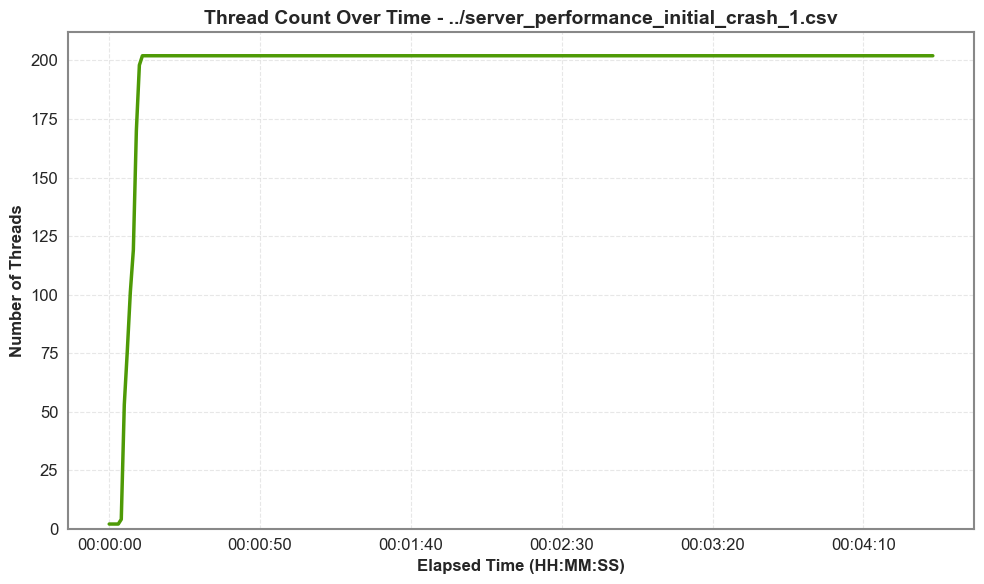

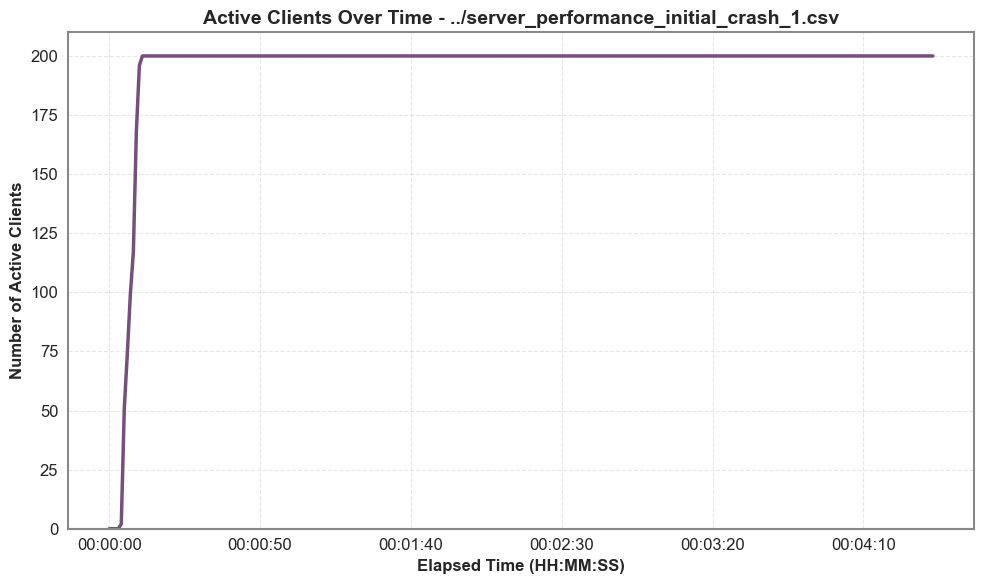

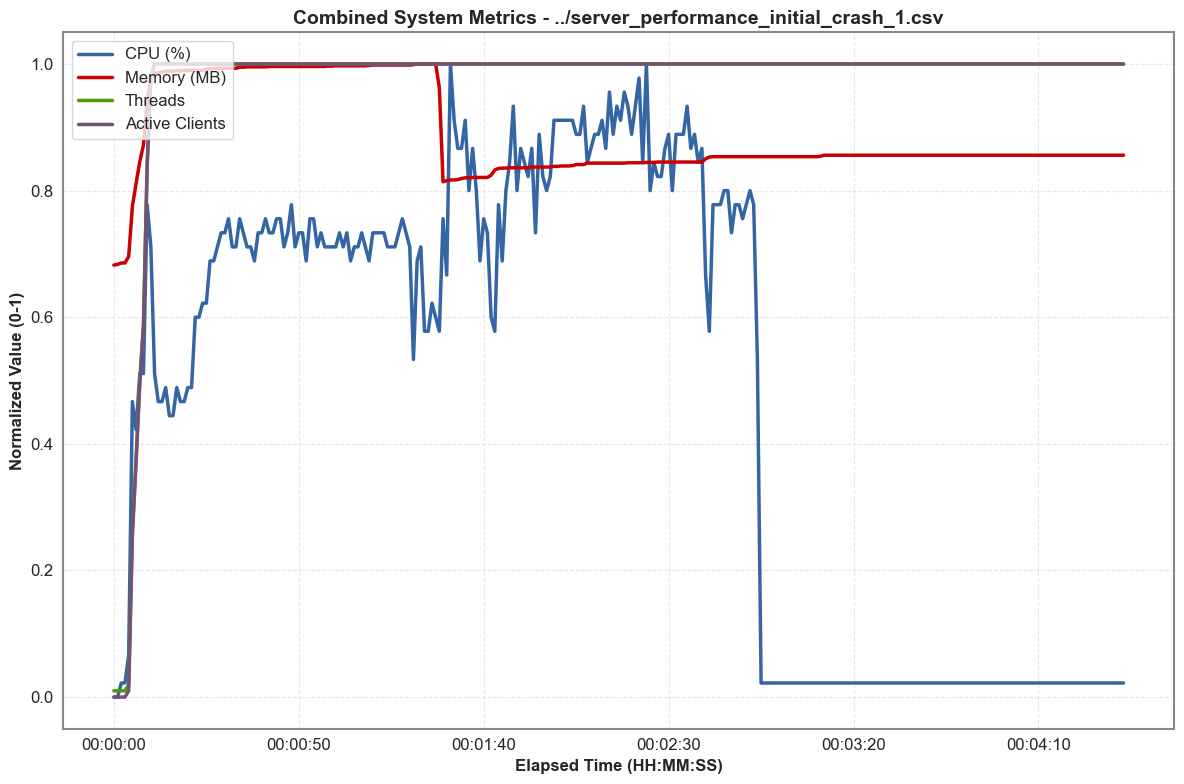


All charts have been saved as PNG files in the current directory.
Files created:
- cpu_usage_chart.png
- memory_usage_chart.png
- thread_count_chart.png
- active_clients_chart.png
- combined_metrics_chart.png


In [54]:
# Run all the plotting functions
print("\nGenerating charts...")
plot_cpu_usage()
plot_memory_usage()
plot_thread_count()
plot_active_clients()
plot_combined_metrics()

print("\nAll charts have been saved as PNG files in the current directory.")
print("Files created:")
print("- cpu_usage_chart.png")
print("- memory_usage_chart.png")
print("- thread_count_chart.png")
print("- active_clients_chart.png")
print("- combined_metrics_chart.png")